# <font style="color:rgb(50,120,229)">Introduction </font>
We had seen in the previous lesson, how to improve contrast in an image using simple intensity scaling approach. In this section, we will describe better ways of improving contrast in the image.

# <font style = "color:rgb(50,120,229)">Histogram Equalization</font>

Histogram Equalization is a non-linear method for enhancing contrast in an image. We have already seen the theory in the video. Now, let's see how to perform histogram equalization using OpenCV using [**`equalizeHist()`**](https://docs.opencv.org/4.1.0/d6/dc7/group__imgproc__hist.html#ga7e54091f0c937d49bf84152a16f76d6e). 

# <font style = "color:rgb(50,120,229)">Histogram Equalization for Grayscale Images</font>

The function [**`equalizeHist()`**](https://docs.opencv.org/4.1.0/d6/dc7/group__imgproc__hist.html#ga7e54091f0c937d49bf84152a16f76d6e) performs histogram equalization on a grayscale image. The syntax is given below.


### <font style = "color:rgb(8,133,37)">Function Syntax</font>

```python
	dst	=	cv2.equalizeHist(	src[, dst]	)
```

**Parameters**

- **`src`** -	Source 8-bit single channel image.
- **`dst`** -	Destination image of the same size and type as src .

In [1]:
import cv2
import matplotlib.pyplot as plt
from dataPath import DATA_PATH
import numpy as np
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (50.0, 50.0)
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['axes.titlesize'] = 20
matplotlib.rcParams['image.interpolation'] = 'bilinear'

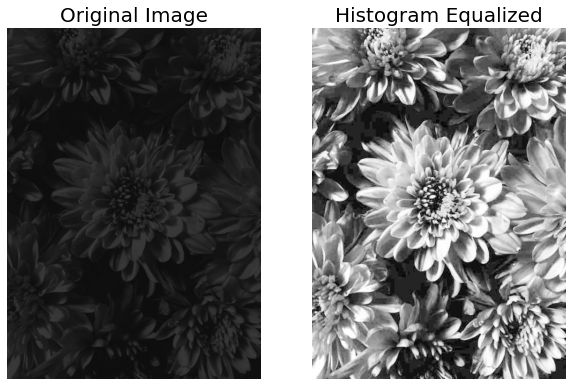

In [3]:
# Read image in grayscale format
filename = "data/images/dark-flowers.jpg"
im = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# Equalize the histogram
imEq = cv2.equalizeHist(im)

# Display images
plt.figure(figsize=(10,10))

ax = plt.subplot(1,2,1)
ax.imshow(im, vmin=0, vmax=255)
ax.set_title("Original Image")
ax.axis('off')

ax = plt.subplot(1,2,2)
ax.imshow(imEq, vmin=0, vmax=255)
ax.set_title("Histogram Equalized")
ax.axis('off')

plt.show()

### <font style = "color:rgb(8,133,37)">Display Histogram</font>

Now, let's look at the histogram of the two images. In the previous section we had used **calcHist()** to calculate histogram. Matplotlib provides an alternative way which has a slightly better syntax. Let's use it here. 

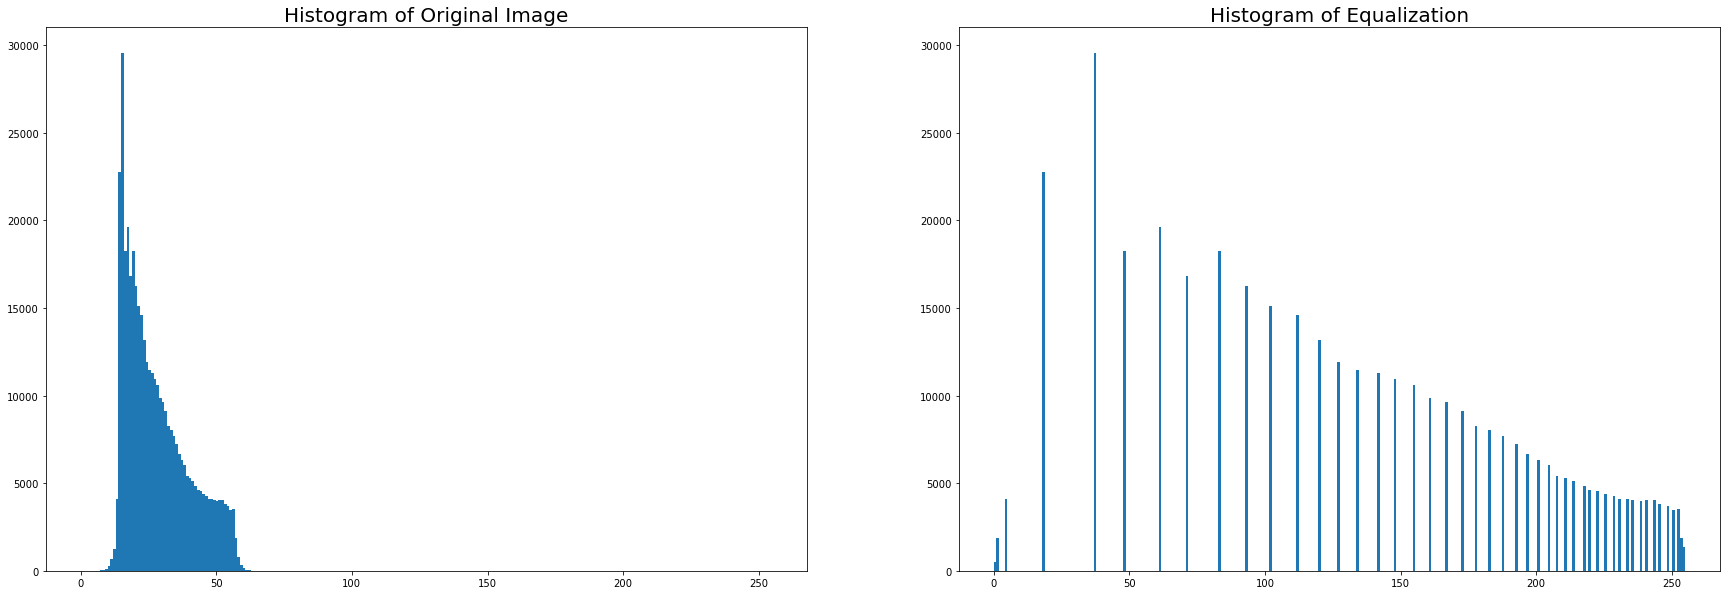

In [4]:
# Display Histogram using Matplotlib
plt.figure(figsize=(30,10))

ax = plt.subplot(1,2,1)
ax.hist(im.ravel(), bins=256, range=[0,255])
ax.set_title('Histogram of Original Image')

ax = plt.subplot(1,2,2)
ax.hist(imEq.ravel(), bins=256, range=[0,255])
ax.set_title('Histogram of Equalization')

plt.show()

As expected, the histogram is spread more uniformly over the range 

# <font style = "color:rgb(50,120,229)">Histogram Equalization for Color Images</font>

One may be tempted to think that we can simply perform histogram equalization for each channel separately. For understanding why it is not a good idea, let's simply implement and see why it is not a good idea. 

### <font style = "color:rgb(8,133,37)">Wrong Way</font>

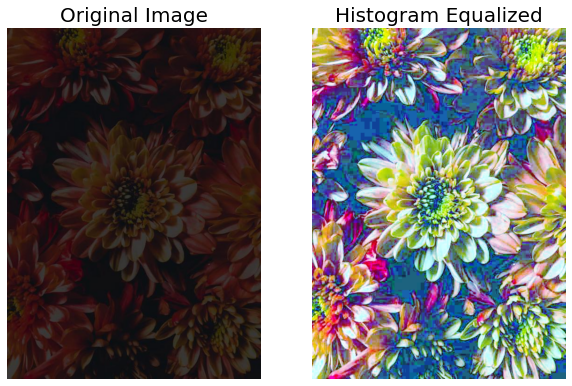

In [5]:
# Read color image
filename = "data/images/dark-flowers.jpg"
im = cv2.imread(filename, cv2.IMREAD_COLOR)
# Create imEq with same shape like image
imEq = np.zeros_like(im)

# Perform histogram Equalization on each color channel separately
for channel in range(im.shape[2]):
    imEq[:,:,channel] = cv2.equalizeHist(im[:,:,channel])

# Display images
plt.figure(figsize=(10,10))

ax = plt.subplot(1,2,1)
ax.imshow(im[...,::-1], vmin=0, vmax=255)
ax.set_title("Original Image")
ax.axis('off')

ax = plt.subplot(1,2,2)
ax.imshow(imEq[...,::-1], vmin=0, vmax=255)
ax.set_title("Histogram Equalized")
ax.axis('off')

plt.show()

### <font style = "color:rgb(8,133,37)">Right Way</font>

We just saw that histogram equalization performed on the three channels separately leads to a bad results. The reason is that when each color channel is non-linearly transformed independently, you can get completely new and unrelated colors. 

The right way to perform histogram equalization on color images is to transform the images to a space like the **HSV** colorspace where colors/hue/tint is separated from the intensity. 

These are the steps involved

1. Tranform the image to HSV colorspace.
2. Perform histogram equalization only on the V channel. 
3. Transform the image back to RGB colorspace.

Let's go over the code. 


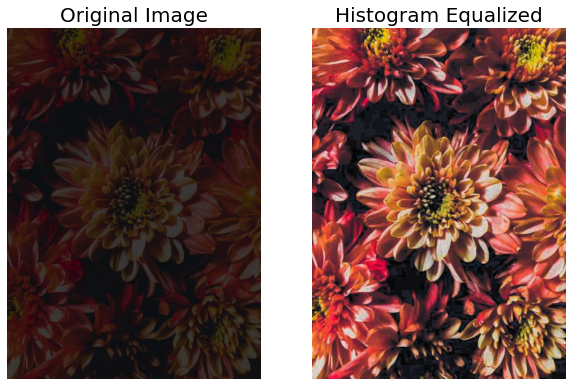

In [6]:
# Read the color image
filename = "data/images/dark-flowers.jpg"
im = cv2.imread(filename, cv2.IMREAD_COLOR)

# Convert to HSV
imhsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)

# Perform histogram Equalization only on the V channel
imhsv[:,:,2] = cv2.equalizeHist(imhsv[:,:,2])

# Convert back to BGR format
imEq = cv2.cvtColor(imhsv, cv2.COLOR_HSV2BGR)

# Display images
plt.figure(figsize=(10,10))

ax = plt.subplot(1,2,1)
ax.imshow(im[...,::-1], vmin=0, vmax=255)
ax.set_title("Original Image")
ax.axis('off')

ax = plt.subplot(1,2,2)
ax.imshow(imEq[...,::-1], vmin=0, vmax=255)
ax.set_title("Histogram Equalized")
ax.axis('off')

plt.show()

## <font style = "color:rgb(50,120,229)">Contrast Limited Adaptive Histogram Equalization (CLAHE) </font>

Histogram equalization uses the pixels of the entire image to improve contrast. While this may look good in many cases, sometimes we may want to enhance the contrast locally so the image does not looks more natural and less dramatic. 

For such applications, we use [Contrast Limited Adaptive Histogram Equalization (CLAHE)](https://docs.opencv.org/4.1.0/d5/daf/tutorial_py_histogram_equalization.html) ) which improves the local contrast. More importantly it allows us to specify the size of the neighborhood that is considered "local".  

Let's pick a different image, where we may prefer CLAHE in place of regular histogram equalization. 

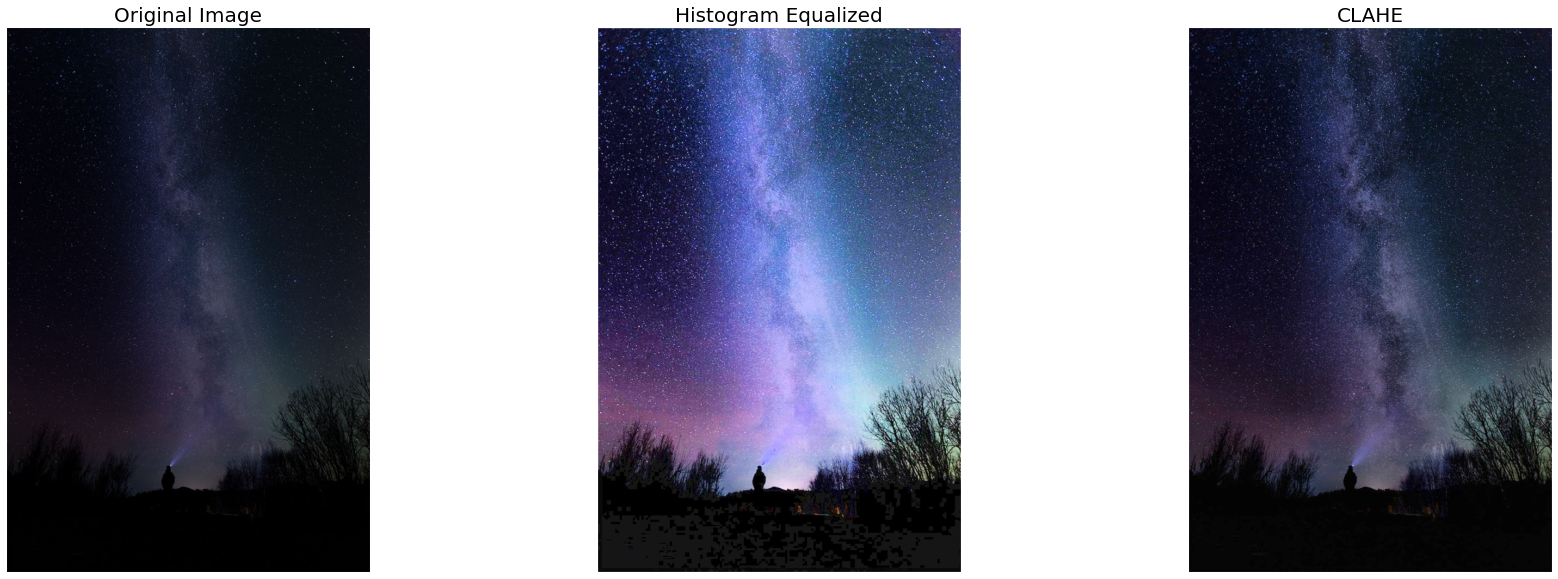

In [7]:
# Read color image
filename = "data/images/night-sky.jpg"
im = cv2.imread(filename, cv2.IMREAD_COLOR)

# Convert to HSV
imhsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
imhsvCLAHE = imhsv.copy()

# Perform histogram equlization only on the V channel
imhsv[:,:,2] = cv2.equalizeHist(imhsv[:,:,2])

clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8))
imhsvCLAHE[:,:,2] = clahe.apply(imhsvCLAHE[:,:,2])

# Convert back to BGR format
imEq = cv2.cvtColor(imhsv, cv2.COLOR_HSV2BGR)
imEqCLAHE = cv2.cvtColor(imhsvCLAHE, cv2.COLOR_HSV2BGR)

#Display images
plt.figure(figsize=(30,10))

ax = plt.subplot(1,3,1)
ax.imshow(im[:,:,::-1], vmin=0, vmax=255)
ax.set_title("Original Image")
ax.axis('off')


ax = plt.subplot(1,3,2)
ax.imshow(imEq[:,:,::-1], vmin=0, vmax=255)
ax.set_title("Histogram Equalized")
ax.axis('off')

ax = plt.subplot(1,3,3)
ax.imshow(imEqCLAHE[:,:,::-1], vmin=0, vmax=255)
ax.set_title("CLAHE")
ax.axis('off')

plt.show()

From the above figure, it is clear that CLAHE performs stretching of values locally since all the peaks in the original histogram have died down. The final image is much more faithful to the original intent of the photographer. 